# Imports
Import libraries and write settings here.

In [6]:
# Notebooks specific imports ########################################
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2
from tqdm.notebook import tqdm
# End notebooks specific imports ####################################

# Basic useful imports
import yaml
from pathlib import Path
import h5py

# Data manipulation
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# From alens_analysis
import alens_analysis as aa
import alens_analysis.chromatin as aac

# Locations
alens_data_path = Path.home() / 'projects/DATA/my_alens_data_new/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
sim_path = alens_data_path / 'MixMotorSliding'

# Load in collected data from simulation
with h5py.File(next(sim_path.glob('analysis/*.h5')), 'r+') as h5_data:
    # Load in time data
    time_arr = h5_data['time'][:]
    print(time_arr.size) # How many time points are there?
    # Load in sylinder data and get center of mass (COM) locations
    sy_dat = h5_data['raw_data']['sylinders'][...]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])

# Plot total displacement of COM of rod 1
_ = plt.plot(time_arr, np.linalg.norm(sy_dat[1,:,:],axis=0))
_ = plt.xlabel("Time")
_ = plt.ylabel("Displacement")

StopIteration: 

Text(0.5, 0, 'Time')

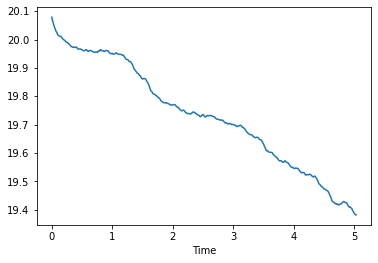

In [10]:
sim_path = alens_data_path / 'MixMotorSliding'
import alens_analysis.chromatin.make_motion_graph as mmg

with h5py.File(next(sim_path.glob('analysis/*.h5')), 'r+') as h5_data:
    fig, ax = mmg.make_motion_graph(h5_data)
    ax.set_xlabel("Time")
    